In [152]:
from SyMBac.PSF import PSF_generator
import matplotlib.pyplot as plt
import tifffile
import numpy as np
from microfilm.colorify import cmaps_def
from matplotlib_scalebar.scalebar import ScaleBar
from scipy.signal import peak_widths, find_peaks
import matplotlib.colors as colors
from skimage.transform import rescale


In [153]:
scale_factor = 1

In [154]:
pix_mic_conv = 0.0433333766667
my_kernel = PSF_generator(
    radius = 20, 
    wavelength = 0.515, 
    NA=1.49, 
    n = 1.518, 
    resize_amount=1, 
    pix_mic_conv=pix_mic_conv, 
    apo_sigma = 10, 
    mode="3d fluo", 
    condenser="Ph3", 
    z_height = 1,
    pz = 0.5,
    working_distance = 170
)
my_kernel.calculate_PSF()
my_kernel.kernel = my_kernel.kernel[0]

In [155]:
real_PSF.shape

(59, 61)

0.0
(39, 41) (40, 40)


/tmp/ipykernel_5057/2241762522.py:9: PeakPropertyWarning: some peaks have a prominence of 0
  print(peak_widths(real_PSF[real_PSF.shape[0]//2], peaks = [peak])[0][0])
/tmp/ipykernel_5057/2241762522.py:9: PeakPropertyWarning: some peaks have a width of 0
  print(peak_widths(real_PSF[real_PSF.shape[0]//2], peaks = [peak])[0][0])


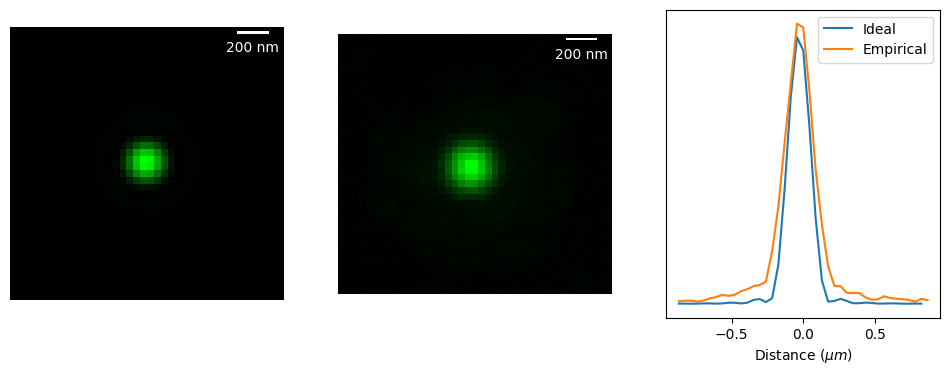

In [156]:
real_PSF = tifffile.imread("single_100x_PSF_postmag.tif")
c = int((real_PSF.shape[-1] - my_kernel.kernel.shape[-1])/2)
x_offset = 2
y_offset = 3.5
real_PSF_slice = 41
real_PSF -= np.round(np.sort(real_PSF[real_PSF_slice,2].flatten())[0:int(len(real_PSF[real_PSF_slice,2].flatten())*.05)].mean()).astype(np.uint)
real_PSF = real_PSF[real_PSF_slice,2,c-int(np.floor(y_offset)):-c-int(np.ceil(y_offset)),c-int(np.floor(x_offset)):-c+1-int(np.ceil(x_offset))]
zpeak = find_peaks(real_PSF[real_PSF.shape[0]//2], height = real_PSF[real_PSF.shape[0]//2].max()/2)[0][0]
print(peak_widths(real_PSF[real_PSF.shape[0]//2], peaks = [peak])[0][0])
#plt.imshow(real_PSF, cmap="Greys_r")
#plt.scatter(real_PSF.shape[0]/2,real_PSF.shape[0]/2, c = "r")
print(real_PSF.shape, my_kernel.kernel.shape)

fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].imshow(my_kernel.kernel, cmap=cmaps_def("pure_green"))
axs[1].imshow(real_PSF, cmap=cmaps_def("pure_green"))
tifffile.imwrite("synth_PSF.tif", my_kernel.kernel)
tifffile.imwrite("real_PSF.tif", real_PSF)

scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.25, color="white", box_color="k")
axs[0].add_artist(scalebar)
scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.25, color="white", box_color="k")
axs[1].add_artist(scalebar)

for ax in axs.flatten()[:2]:
    ax.axis("off")

real_x_axis = np.arange(real_PSF.shape[1]) - real_PSF.shape[0]//2-1
real_x_axis = real_x_axis.astype(float) * pix_mic_conv
kernel_x_axis = np.arange(my_kernel.kernel.shape[0]) - my_kernel.kernel.shape[0]//2
kernel_x_axis = kernel_x_axis.astype(float) * pix_mic_conv

axs[2].plot(kernel_x_axis, my_kernel.kernel[my_kernel.kernel.shape[0]//2]/my_kernel.kernel.max())
axs[2].plot(real_x_axis, real_PSF[real_PSF.shape[0]//2]/real_PSF.max())
axs[2].legend(["Ideal", "Empirical"])
axs[2].set_xlabel("Distance ($\mu m$)")
axs[2].set_yticks([])
plt.show()

In [160]:
real_x_axis = np.arange(real_PSF.shape[1]) - real_PSF.shape[0]//2-1
real_x_axis
real_x_axis.astype(float) * pix_mic_conv

array([-0.86666753, -0.82333416, -0.78000078, -0.7366674 , -0.69333403,
       -0.65000065, -0.60666727, -0.5633339 , -0.52000052, -0.47666714,
       -0.43333377, -0.39000039, -0.34666701, -0.30333364, -0.26000026,
       -0.21666688, -0.17333351, -0.13000013, -0.08666675, -0.04333338,
        0.        ,  0.04333338,  0.08666675,  0.13000013,  0.17333351,
        0.21666688,  0.26000026,  0.30333364,  0.34666701,  0.39000039,
        0.43333377,  0.47666714,  0.52000052,  0.5633339 ,  0.60666727,
        0.65000065,  0.69333403,  0.7366674 ,  0.78000078,  0.82333416,
        0.86666753])

In [86]:
len(my_kernel.kernel[my_kernel.kernel.shape[0]//2]/my_kernel.kernel.max())

40

In [87]:
len(real_PSF[real_PSF.shape[0]//2]/real_PSF.max())

41

Show that an empirical kernel, when apodised to look like the ideal kernel, yields the same microcolony results (3D version)

In [149]:
scale_factor = 1
pix_mic_conv = 0.0433333766667 * scale_factor
my_kernel = PSF_generator(
    radius = 30, 
    wavelength = 0.515, 
    NA=1.49, 
    n = 1.518, 
    resize_amount=1, 
    pix_mic_conv=pix_mic_conv, 
    apo_sigma = 10, 
    mode="3d fluo", 
    condenser="Ph3", 
    z_height = 23,
    pz = 0.5,
    working_distance = 170
)
my_kernel.calculate_PSF()
my_kernel.kernel = my_kernel.kernel.sum(axis=0)
#my_kernel.kernel = my_kernel.kernel[0]

In [150]:
real_PSF = tifffile.imread("single_100x_PSF_postmag.tif").astype(np.float32)
c = int((real_PSF.shape[-1] - my_kernel.kernel.shape[-1])/2)
x_offset = 2
y_offset = 3.5
real_PSF_slice = 44
real_PSF -= np.round(np.sort(real_PSF[real_PSF_slice,2].flatten())[0:int(len(real_PSF[real_PSF_slice,2].flatten())*.05)].mean()).astype(np.uint)
real_PSF = real_PSF[real_PSF_slice-10:real_PSF_slice+10,2,c-int(np.floor(y_offset)):-c-int(np.ceil(y_offset)),c-int(np.floor(x_offset)):-c+1-int(np.ceil(x_offset))].sum(axis=0)
real_PSF = rescale(real_PSF, scale_factor  , anti_aliasing=True)
#peak = find_peaks(real_PSF[real_PSF.shape[0]//2], height = real_PSF[real_PSF.shape[0]//2].max()/2)[0][0]
#print(peak_widths(real_PSF[real_PSF.shape[0]//2], peaks = [peak])[0][0])
#plt.imshow(real_PSF, cmap="Greys_r")
#plt.scatter(real_PSF.shape[0]/2,real_PSF.shape[0]/2, c = "r")
print(real_PSF.shape, my_kernel.kernel.shape)


(59, 61) (60, 60)


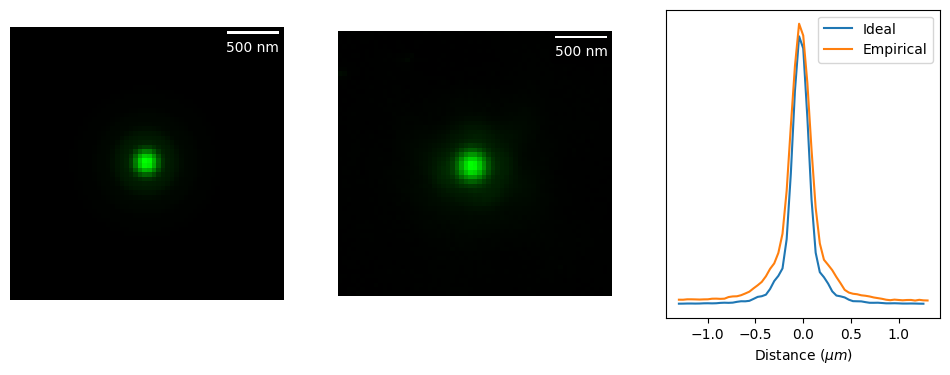

In [151]:

fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].imshow(my_kernel.kernel, cmap=cmaps_def("pure_green"))
axs[1].imshow(real_PSF, cmap=cmaps_def("pure_green"))
tifffile.imwrite("synth_PSF.tif", my_kernel.kernel)
tifffile.imwrite("real_PSF.tif", real_PSF)

scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.25, color="white", box_color="k")
axs[0].add_artist(scalebar)
scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.25, color="white", box_color="k")
axs[1].add_artist(scalebar)

for ax in axs.flatten()[:2]:
    ax.axis("off")

real_x_axis = np.arange(real_PSF.shape[1]) - real_PSF.shape[0]//2-1
real_x_axis = real_x_axis.astype(float) * pix_mic_conv
kernel_x_axis = np.arange(my_kernel.kernel.shape[0]) - my_kernel.kernel.shape[0]//2
kernel_x_axis = kernel_x_axis.astype(float) * pix_mic_conv

axs[2].plot(kernel_x_axis, my_kernel.kernel[my_kernel.kernel.shape[0]//2]/my_kernel.kernel.max())
axs[2].plot(real_x_axis, real_PSF[real_PSF.shape[0]//2]/real_PSF[real_PSF.shape[0]//2].max())
axs[2].legend(["Ideal", "Empirical"])
axs[2].set_xlabel("Distance ($\mu m$)")
axs[2].set_yticks([])
plt.show()